In [1]:
!pip install nnetsauce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 3.0 MB/s eta 0:00:00


In [2]:
import nnetsauce as ns
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from time import time

In [3]:
url = "https://raw.githubusercontent.com/thierrymoudiki/mts-data/master/heater-ice-cream/ice_cream_vs_heater.csv"

df = pd.read_csv(url)

# ice cream vs heater (I don't own the copyright)
df.set_index('Month', inplace=True)
df.index.rename('date')

df = df.pct_change().dropna()

idx_train = int(df.shape[0]*0.8)
idx_end = df.shape[0]
df_train = df.iloc[0:idx_train,]

In [4]:
regr3 = Ridge()
obj_MTS3 = ns.MTS(regr3, lags = 3, n_hidden_features=7, #IRL, must be tuned
                  replications=50, kernel='gaussian',
                  seed=24, verbose = 1)
start = time()
obj_MTS3.fit(df_train)
print(f"Elapsed {time()-start} s")


 Adjusting Ridge to multivariate time series... 
 


100%|██████████| 2/2 [00:00<00:00, 107.89it/s]


 Simulate residuals using gaussian kernel... 




 Best parameters for gaussian kernel: {'bandwidth': 0.07054802310718646} 

Elapsed 0.7971079349517822 s


In [5]:
res = obj_MTS3.predict(h=15)
print("\n")
print(f" Predictive simulations #10: \n{obj_MTS3.sims_[9]}")
print("\n")
print(f" Predictive simulations #25: \n{obj_MTS3.sims_[24]}")

100%|██████████| 50/50 [00:00<00:00, 4142.85it/s]



 Predictive simulations #10: 
              heater  ice cream
date                           
2017-03-01  0.141747  -0.012591
2017-04-01 -0.349139   0.056694
2017-05-01  0.033484   0.184687
2017-06-01 -0.251965   0.555005
2017-07-01  0.089790   0.041704
2017-08-01 -0.121865   0.010122
2017-09-01 -0.071689   0.112830
2017-10-01 -0.153881  -0.142345
2017-11-01  0.296345  -0.374617
2017-12-01  0.141161  -0.390741
2018-01-01  0.238956  -0.080460
2018-02-01  0.160854  -0.077932
2018-03-01 -0.156277   0.029540
2018-04-01  0.107372   0.077838
2018-05-01  0.046673  -0.014606


 Predictive simulations #25: 
              heater  ice cream
date                           
2017-03-01  0.049393   0.200078
2017-04-01 -0.169123   0.071978
2017-05-01  0.240148   0.807992
2017-06-01 -0.035568  -0.071221
2017-07-01 -0.127216   0.242101
2017-08-01 -0.154333  -0.147524
2017-09-01  0.041868  -0.126955
2017-10-01 -0.018202  -0.069395
2017-11-01 -0.196634  -0.152304
2017-12-01  0.022303  -0.007103
2018-01-

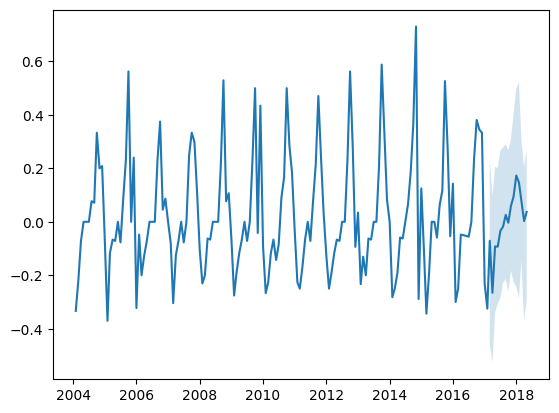

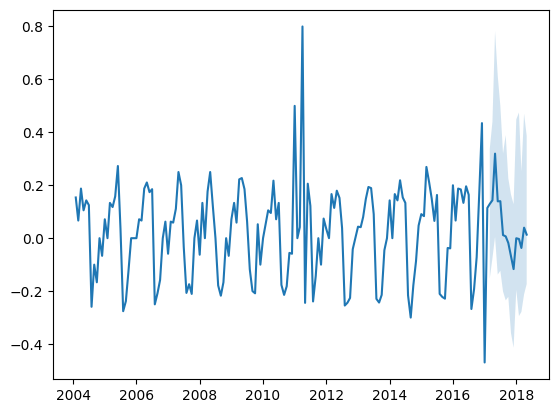

In [6]:
obj_MTS3.plot("heater")
obj_MTS3.plot("ice cream")

In [7]:
regr3 = RandomForestRegressor(n_estimators=250)
obj_MTS3 = ns.MTS(regr3, lags = 3, n_hidden_features=7, #IRL, must be tuned
                  replications=50, kernel='gaussian',
                  seed=24, verbose = 1)
start = time()
obj_MTS3.fit(df_train)
print(f"Elapsed {time()-start} s")


 Adjusting RandomForestRegressor to multivariate time series... 
 


100%|██████████| 2/2 [00:01<00:00,  1.63it/s]



 Simulate residuals using gaussian kernel... 


 Best parameters for gaussian kernel: {'bandwidth': 0.030538555088334186} 

Elapsed 1.8268647193908691 s


In [8]:
res = obj_MTS3.predict(h=15)
print("\n")
print(f" Predictive simulations #10: \n{obj_MTS3.sims_[9]}")
print("\n")
print(f" Predictive simulations #25: \n{obj_MTS3.sims_[24]}")

100%|██████████| 50/50 [00:00<00:00, 6480.29it/s]



 Predictive simulations #10: 
              heater  ice cream
date                           
2017-03-01 -0.035600   0.377000
2017-04-01  0.080882  -0.052492
2017-05-01  0.032731   0.031515
2017-06-01 -0.135033   0.223675
2017-07-01 -0.207279   0.102103
2017-08-01 -0.282029   0.165736
2017-09-01 -0.125396   0.214221
2017-10-01 -0.113341   0.121283
2017-11-01  0.029696   0.023431
2017-12-01  0.008325  -0.142594
2018-01-01  0.035524  -0.173210
2018-02-01  0.237856  -0.212737
2018-03-01  0.367535  -0.178579
2018-04-01  0.302345  -0.011422
2018-05-01  0.060627   0.009021


 Predictive simulations #25: 
              heater  ice cream
date                           
2017-03-01 -0.039143   0.474916
2017-04-01  0.151619  -0.011861
2017-05-01  0.144209   0.178119
2017-06-01 -0.067686  -0.028334
2017-07-01 -0.261809   0.090104
2017-08-01 -0.217126   0.069040
2017-09-01 -0.121135   0.155083
2017-10-01 -0.088740   0.184311
2017-11-01 -0.114311   0.120962
2017-12-01 -0.020214  -0.035725
2018-01-

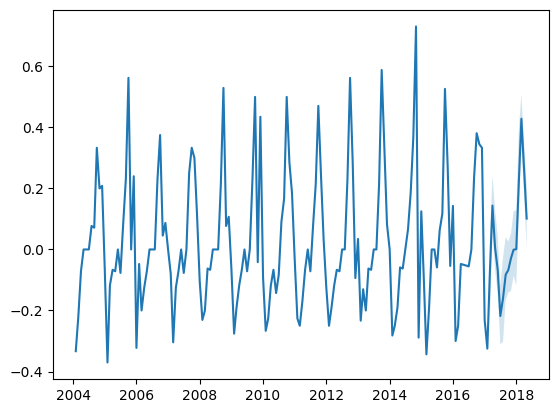

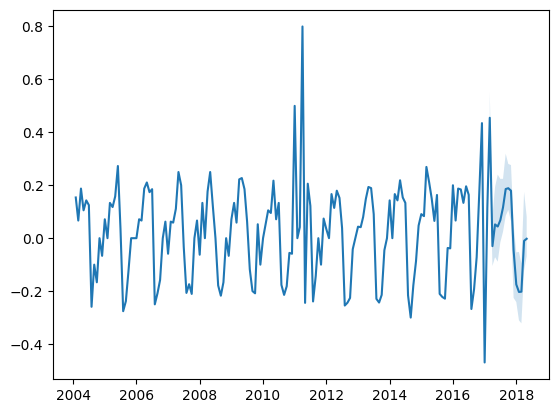

In [9]:
obj_MTS3.plot("heater")
obj_MTS3.plot("ice cream")

In [10]:
regr4 = BayesianRidge()
obj_MTS4 = ns.MTS(regr4, lags = 3, n_hidden_features=7, #IRL, must be tuned
                  seed=24)
start = time()
obj_MTS4.fit(df_train)
print(f"\n\n Elapsed {time()-start} s")

100%|██████████| 2/2 [00:00<00:00, 145.60it/s]



 Elapsed 0.04791569709777832 s


In [11]:
res = obj_MTS4.predict(h=15, return_std=True)

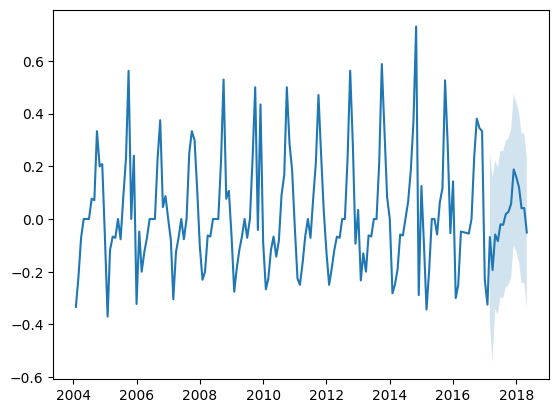

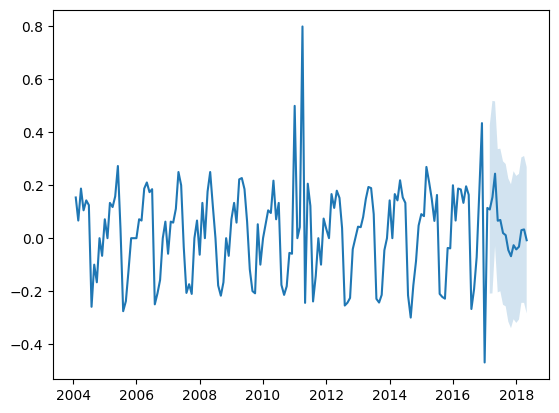

In [12]:
obj_MTS4.plot("heater")
obj_MTS4.plot("ice cream")

In [13]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.3
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.40
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==5.2.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.4.1
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.2
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==3.0.2
dask==2023.8.1
datascie